# The following cell is the model class. 
Its __call__ method returns the predicted FPS according to aformentioned formula.
Its load_variables method loads previously trained parameters which will be used by the __call__ method to make predictions.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow_training as tft
import tensorflow.keras.optimizers as optimizers

# Manually assigned data sets
First, I will manually create some data for supervised learning training.

In [2]:
## first axis is the sample label and the second index is the dimension of the data.
X_train_raw=np.random.sample((400,2))

In [3]:
## This is the function categorizes the data.
def findy(X):
    a=X[1]-X[0]
    b=X[1]+X[0]-1
    if a>0 and b>0:
        return [1,0,0,0]
    elif a>0 and b<0:
        return [0,1,0,0]
    elif a<0 and b>0:
        return [0,0,1,0]
    elif a<0 and b<0:
        return [0,0,0,1]
    else:
        return None

In [4]:
X_train=[]
y_train=[]
for i in X_train_raw:
    if findy(i):
        y_train.append(findy(i))
        X_train.append(i)
        
X_train=np.array(X_train,dtype=np.float32)
y_train=np.array(y_train,dtype=np.float32)

In [5]:
# Then lets visualize the data.
def find(index):
    x,y=[],[]
    for i,m in zip(y_train,X_train):
        j=0
        while j<len(i):
            if i[j]==max(i):
                break
            else:
                j+=1
        if j==index:
            x.append(m[0])
            y.append(m[1])
    return x,y

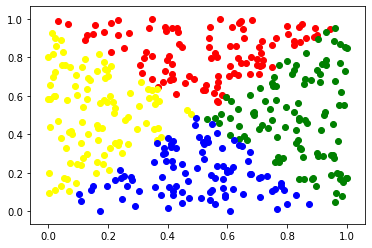

In [6]:
figure,ax=plt.subplots(1,1)
colors=['red','yellow','green','blue']
for i in range(4):
    x,y=find(i)
    ax.scatter(x,y,c=colors[i])

## Experiment 1

In [6]:
layers=[tft.layer(shape=(2,)),tft.layer(shape=(4,),activation='softmax')]
testmodel=tft.sequential(layers)
testmodel.compile(loss='categorical_crossentropy',optimizer=optimizers.Adam(lr=0.1))
testmodel.train(X_train,y_train,epochs=30000,epochgroup=1000,save_name='weights_bias')

### Next, let's visualize the prediction.

In [16]:
def find(index):
    X_predict=testmodel.predict(X_train)
    x,y=[],[]
    for i,m in zip(X_predict,X_train):
        j=0
        while j<len(i):
            if i[j]==max(i):
                break
            else:
                j+=1
        if j==index:
            x.append(m[0])
            y.append(m[1])
    return x,y

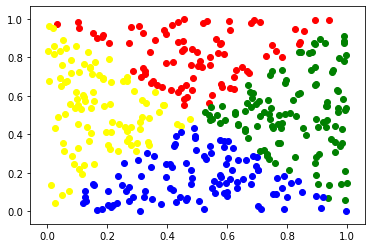

In [17]:
figure,ax=plt.subplots(1,1)
colors=['red','yellow','green','blue']
for i in range(4):
    x,y=find(i)
    ax.scatter(x,y,c=colors[i])

In [26]:
weights,bias=testmodel.trainable_variables
weights=weights.numpy()
bias=bias.numpy()

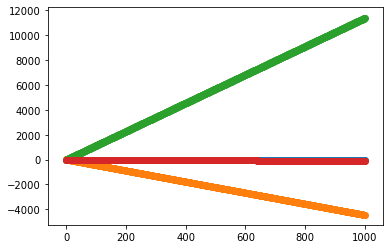

In [31]:
x=np.arange(0,1000,1)
figure,ax=plt.subplots(1,1)
for i in range(4):
    y=-(weights[0,i]*x+bias[i])/weights[1,i]
    ax.scatter(x,y)

In [20]:
weights

<tf.Variable 'Variable:0' shape=(2, 4) dtype=float32, numpy=
array([[   19.623219,  -967.31696 ,   853.2918  ,  -136.71696 ],
       [  779.0078  ,  -216.88548 ,   -74.94131 , -1093.7977  ]],
      dtype=float32)>

## Experiment 2

In [32]:
layers=[tft.layer(shape=(2,)),tft.layer(shape=(2,),activation='selu'),\
        tft.layer(shape=(4,),activation='softmax')]
testmodel1=tft.sequential(layers)
testmodel1.compile(loss='categorical_crossentropy',optimizer=optimizers.Adam(lr=0.1))
testmodel1.train(X_train,y_train,epochs=10000,epochgroup=1000,save_name='weights_bias')

for epoch 0, categorical_crossentropy is 11.853612899780273
for epoch 1000, categorical_crossentropy is 0.08486304432153702
for epoch 2000, categorical_crossentropy is 0.039893511682748795
for epoch 3000, categorical_crossentropy is 0.017579706385731697
for epoch 4000, categorical_crossentropy is 0.009084152989089489
for epoch 5000, categorical_crossentropy is 0.004776648245751858
for epoch 6000, categorical_crossentropy is 0.0034292167983949184
for epoch 7000, categorical_crossentropy is 0.0023049074225127697
for epoch 8000, categorical_crossentropy is 0.0015025121392682195
for epoch 9000, categorical_crossentropy is 0.0009495346457697451
model has been saved


In [33]:
def find(index):
    X_predict=testmodel1.predict(X_train)
    x,y=[],[]
    for i,m in zip(X_predict,X_train):
        j=0
        while j<len(i):
            if i[j]==max(i):
                break
            else:
                j+=1
        if j==index:
            x.append(m[0])
            y.append(m[1])
    return x,y

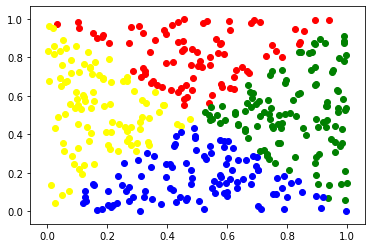

In [34]:
figure,ax=plt.subplots(1,1)
colors=['red','yellow','green','blue']
for i in range(4):
    x,y=find(i)
    ax.scatter(x,y,c=colors[i])

In [36]:
weights=testmodel1.weights
bias=testmodel1.bias

In [37]:
weights

[<tf.Variable 'Variable:0' shape=(2, 2) dtype=float32, numpy=
 array([[-10.935648,  14.912537],
        [-11.114683, -14.927422]], dtype=float32)>,
 <tf.Variable 'Variable:0' shape=(2, 4) dtype=float32, numpy=
 array([[-49.053936,  36.43345 , -45.85035 ,  38.21494 ],
        [-16.6315  , -27.824354,  14.41658 ,  15.367029]], dtype=float32)>]

In [38]:
bias

[<tf.Variable 'Variable:0' shape=(2,) dtype=float32, numpy=array([10.916653  , -0.08776704], dtype=float32)>,
 <tf.Variable 'Variable:0' shape=(4,) dtype=float32, numpy=array([-6.3549004,  1.1909791,  4.9933567, -1.3361964], dtype=float32)>]

# Another type of data

In [11]:
## first axis is the sample label and the second index is the dimension of the data.
X_train_raw=2*np.random.sample((1000,2))-1 # a square with length 2 centered at the coordinate center
## This is the function categorizes the data.
def findy(X):
    R=np.sqrt(X[0]**2+X[1]**2)
    if R<0.75:
        return [1,0,]
    elif R>0.75:
        return [0,1,]
    else:
        return None
X_train=[]
y_train=[]
for i in X_train_raw:
    if findy(i):
        y_train.append(findy(i))
        X_train.append(i)
        
X_train=np.array(X_train,dtype=np.float32)
y_train=np.array(y_train,dtype=np.float32)

In [12]:
# Then lets visualize the data.
def find(index):
    x,y=[],[]
    for i,m in zip(y_train,X_train):
        j=0
        while j<len(i):
            if i[j]==max(i):
                break
            else:
                j+=1
        if j==index:
            x.append(m[0])
            y.append(m[1])
    return x,y

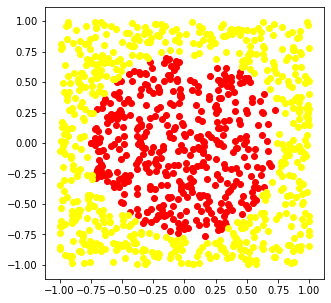

In [66]:
figure,ax=plt.subplots(1,1,figsize=(5, 5))
colors=['red','yellow']
for i in range(2):
    x,y=find(i)
    ax.scatter(x,y,c=colors[i])

## Experiment 1

In [14]:
layers=[tft.layer(shape=(2,)),tft.layer(shape=(100,),activation='selu'),\
        tft.layer(shape=(2,),activation='softmax')]
testmodel1=tft.sequential(layers)
testmodel1.compile(loss='categorical_crossentropy',optimizer=optimizers.Adam(lr=0.1))
testmodel1.train(X_train,y_train,epochs=10000,epochgroup=1000,save_name='weights_bias')

Instructions for updating:
This op will be removed after the deprecation date. Please switch to tf.sets.difference().
for epoch 0, categorical_crossentropy is 8.030808448791504
for epoch 1000, categorical_crossentropy is 0.007621411699801683
for epoch 2000, categorical_crossentropy is 0.0015854563098400831
for epoch 3000, categorical_crossentropy is 0.0005402123788371682
for epoch 4000, categorical_crossentropy is 0.00024080427829176188
for epoch 5000, categorical_crossentropy is 0.00012029607023578137
for epoch 6000, categorical_crossentropy is 6.373236101353541e-05
for epoch 7000, categorical_crossentropy is 3.5381137422518805e-05
for epoch 8000, categorical_crossentropy is 2.012554250541143e-05
for epoch 9000, categorical_crossentropy is 1.1593372619245201e-05
model has been saved


In [49]:
def find(index):
    X_predict=testmodel1.predict(X_train)
    x,y=[],[]
    for i,m in zip(X_predict,X_train):
        j=0
        while j<len(i):
            if i[j]==max(i):
                break
            else:
                j+=1
        if j==index:
            x.append(m[0])
            y.append(m[1])
    return x,y

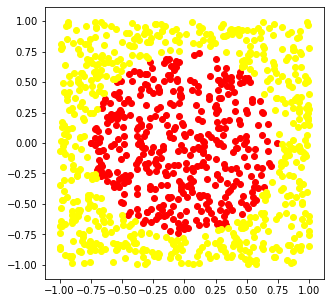

In [52]:
figure,ax=plt.subplots(1,1,figsize=(5, 5))
colors=['red','yellow']
for i in range(2):
    x,y=find(i)
    ax.scatter(x,y,c=colors[i])

In [53]:
weights=testmodel1.weights
bias=testmodel1.bias

In [54]:
layer1_w=weights[0].numpy()
layer1_b=bias[0].numpy()

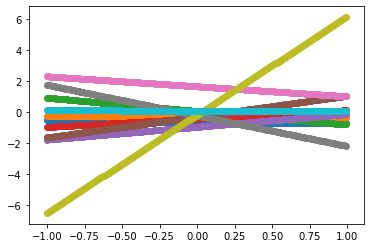

In [56]:
x=np.arange(-1,1,0.01)
figure,ax=plt.subplots(1,1)
for i in range(10):
    y=-(layer1_w[0,i]*x+layer1_b[i])/layer1_w[1,i]
    ax.scatter(x,y)

## Experiment 2

In [70]:
layers=[tft.layer(shape=(2,)),tft.layer(shape=(4,),activation='selu'),\
        tft.layer(shape=(2,),activation='softmax')]
testmodel2=tft.sequential(layers)
testmodel2.compile(loss='categorical_crossentropy',optimizer=optimizers.Adam(lr=0.1))
testmodel2.train(X_train,y_train,epochs=10000,epochgroup=1000,save_name='weights_bias')

for epoch 0, categorical_crossentropy is 7.964191436767578
for epoch 1000, categorical_crossentropy is 0.820817768573761
for epoch 2000, categorical_crossentropy is 1.7158833742141724
for epoch 3000, categorical_crossentropy is 0.7006822824478149
for epoch 4000, categorical_crossentropy is 0.6795980334281921
for epoch 5000, categorical_crossentropy is 0.6854099035263062
for epoch 6000, categorical_crossentropy is 0.7039532661437988
for epoch 7000, categorical_crossentropy is 0.5456207990646362
for epoch 8000, categorical_crossentropy is 0.47617125511169434
for epoch 9000, categorical_crossentropy is 0.42181363701820374
model has been saved


In [71]:
def find(index):
    X_predict=testmodel2.predict(X_train)
    x,y=[],[]
    for i,m in zip(X_predict,X_train):
        j=0
        while j<len(i):
            if i[j]==max(i):
                break
            else:
                j+=1
        if j==index:
            x.append(m[0])
            y.append(m[1])
    return x,y

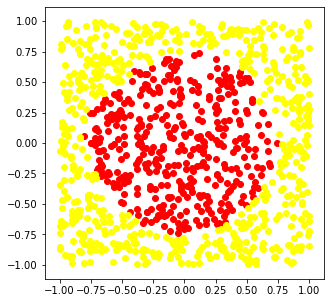

In [72]:
figure,ax=plt.subplots(1,1,figsize=(5, 5))
colors=['red','yellow']
for i in range(2):
    x,y=find(i)
    ax.scatter(x,y,c=colors[i])

In [73]:
weights=testmodel2.weights
bias=testmodel2.bias

In [74]:
layer1_w=weights[0].numpy()
layer1_b=bias[0].numpy()

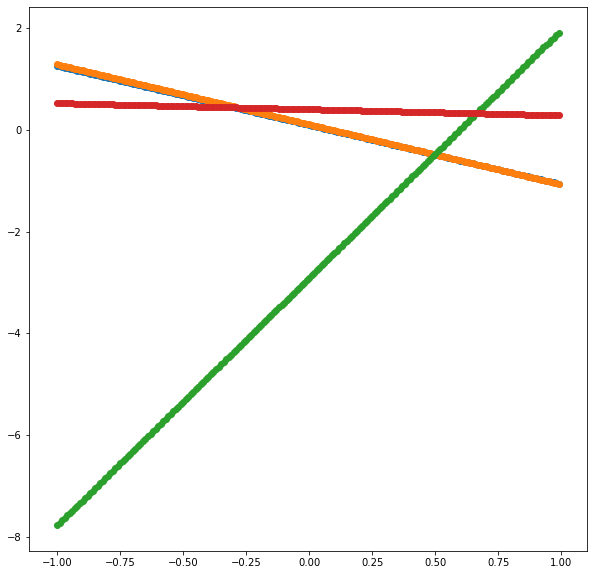

In [77]:
x=np.arange(-1,1,0.01)
figure,ax=plt.subplots(1,1,figsize=(10, 10))
for i in range(4):
    y=-(layer1_w[0,i]*x+layer1_b[i])/layer1_w[1,i]
    ax.scatter(x,y)